In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url="/content/AirPassengers.csv"

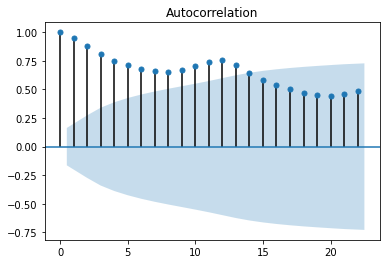

In [3]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
series = pd.read_csv(url, header=0, index_col=0)
plot_acf(series)
pyplot.show()

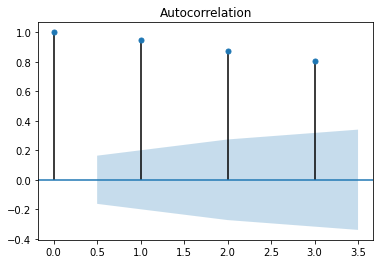

In [4]:
plot_acf(series, lags=3) 
pyplot.show()

In [17]:
from statsmodels.tsa.stattools import acf
func, confidence_interval, qstat,pvalue= acf(series,nlags=3) 
print(pvalue)

0.8066811554965003


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [6]:
url1="https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv"

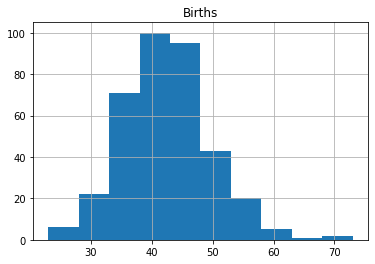

In [7]:
df=pd.read_csv(url1,header=0,index_col=0)
df.hist()
plt.show()

In [9]:
X = df.values
split = round(len(X) / 2)
split_1, split_2 = X[0: split], X[split:]
split_1_var, split_1_var = split_1.var(), split_2.var()
split_1_mean, split_2_mean = split_1.mean(), split_2.mean()
print('mean1=%f, mean2=%f' % (split_1_mean, split_2_mean))
print('variance1=%f, variance2=%f' % (split_1_var, split_1_var))

mean1=39.763736, mean2=44.185792
variance1=48.708651, variance2=48.708651


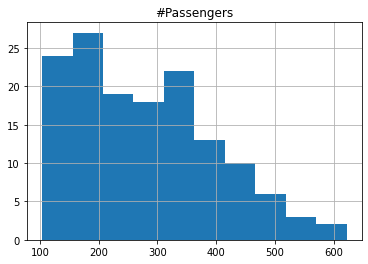

In [10]:
from pandas import read_csv
import matplotlib.pyplot as plt
df = read_csv(url, header=0, index_col=0)
df.hist()
plt.show()

In [11]:
X = df.values
split = round(len(X) / 2)
split_1, split_2 = X[0: split], X[split:]
split_1_var, split_1_var = split_1.var(), split_2.var()
split_1_mean, split_2_mean = split_1.mean(), split_2.mean()
print('mean1=%f, mean2=%f' % (split_1_mean, split_2_mean))
print('variance1=%f, variance2=%f' % (split_1_var, split_1_var))

mean1=182.902778, mean2=377.694444
variance1=7367.962191, variance2=7367.962191


In [16]:
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
df= pd.read_csv(url1, header=0, index_col=0, squeeze=True)
X = df.values
result = adfuller(X)
print('ADF Statistic: %f '% result[0])
print('p-value: %f'% result[1])
print('Critical values:')
for key, value in result[4].items(): 
  print("\t%s:%.3f" % (key, value))

ADF Statistic: -4.808291 
p-value: 0.000052
Critical values:
	1%:-3.449
	5%:-2.870
	10%:-2.571


<ipython-input-19-411c3f3bd715>:8: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  air_passengers["1952"].plot(kind="bar", color='tab:green', legend=False);


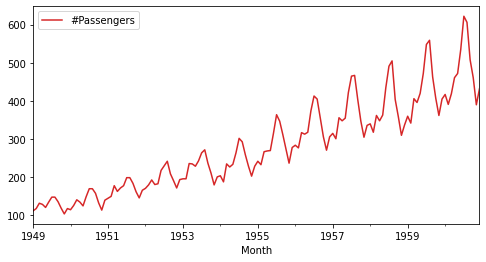

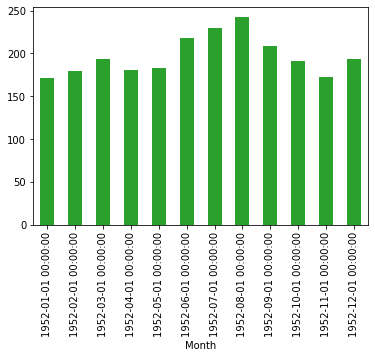

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
air_passengers = pd.read_csv(url, index_col=0, parse_dates=True)
air_passengers.head()
air_passengers.plot(figsize=(8,4), color="tab:red");
air_passengers["1952"].plot(kind="bar", color='tab:green', legend=False);

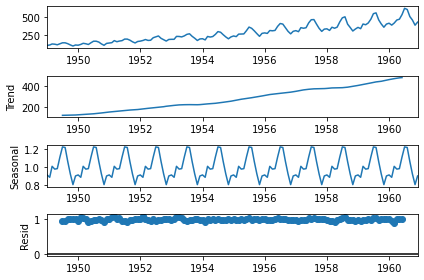

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(air_passengers, model="multiplicative&quot")
trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid
decompose_result.plot();

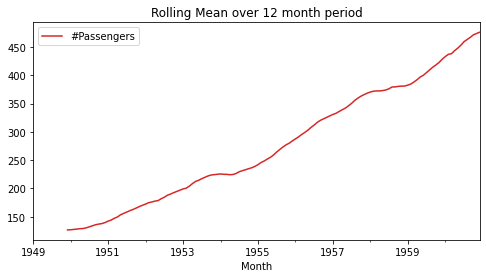

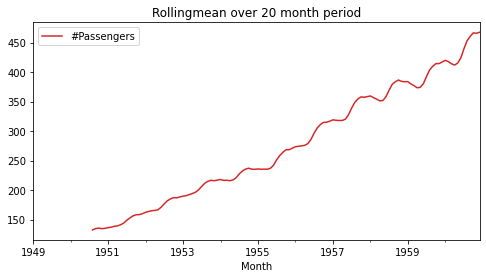

In [22]:
air_passengers.rolling(window = 12).mean().plot(figsize=(8,4), color="tab:red", title='Rolling Mean over 12 month period');
air_passengers.rolling(window = 20).mean().plot(figsize=(8,4), color="tab:red", title="Rollingmean over 20 month period");

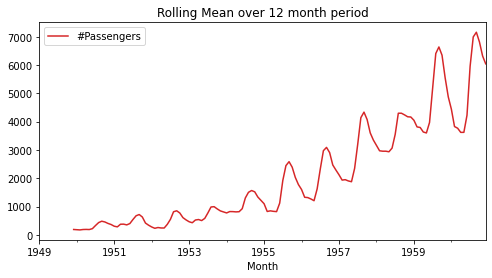

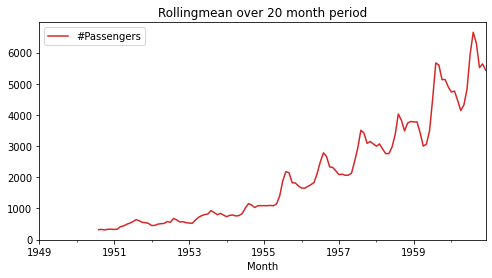

In [23]:
air_passengers.rolling(window = 12).var().plot(figsize=(8,4), color="tab:red", title='Rolling Mean over 12 month period');
air_passengers.rolling(window = 20).var().plot(figsize=(8,4), color="tab:red", title="Rollingmean over 20 month period");

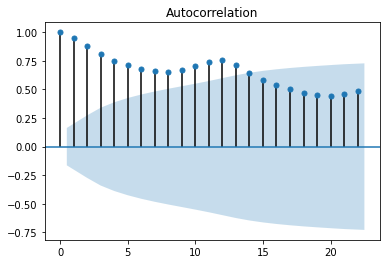

In [24]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(air_passengers);

In [28]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(air_passengers['#Passengers'], autolag = 'AIC')
print(dftest[0])
print( dftest[1])
print( dftest[2])
print(dftest[3])
print("5. Critical Values")
for key, val in dftest[4].items():
  print("\t",key, ':', val)

0.8153688792060472
0.991880243437641
13
130
5. Critical Values
	 1% : -3.4816817173418295
	 5% : -2.8840418343195267
	 10% : -2.578770059171598


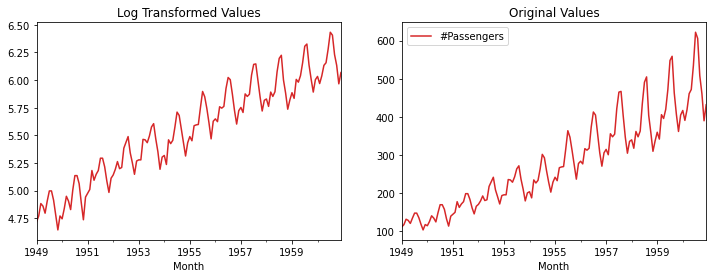

In [30]:
logged_passengers = air_passengers["#Passengers"].apply(lambda x : np.log(x))
ax1 = plt.subplot(121)
logged_passengers.plot(figsize=(12,4) ,color='tab:red', title='Log Transformed Values',ax=ax1);
ax2 = plt.subplot(122)
air_passengers.plot(color='tab:red', title='Original Values', ax=ax2);

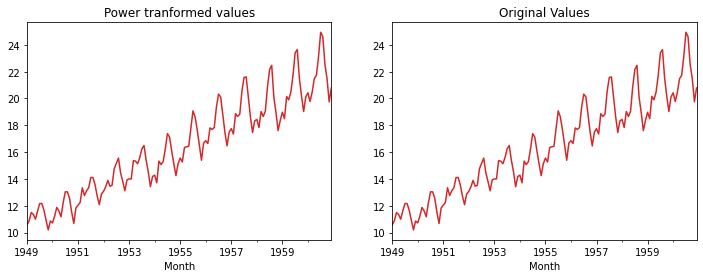

In [31]:
powered_passengers = air_passengers["#Passengers"].apply(lambda x :  x ** 0.5)
ax1 = plt.subplot(121)
powered_passengers.plot(figsize=(12,4) ,color='tab:red', title='Power tranformed values',ax=ax1);
ax2 = plt.subplot(122)
powered_passengers.plot(color='tab:red', title='Original Values', ax=ax2);

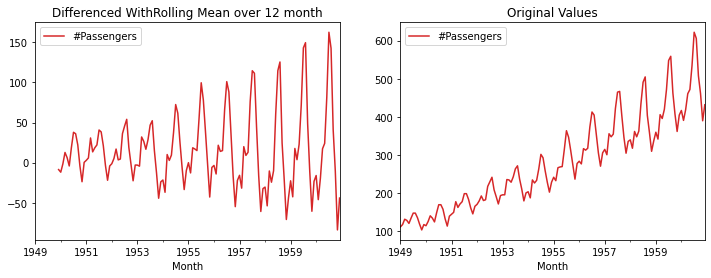

In [32]:
rolling_mean = air_passengers.rolling(window = 12).mean()
passengers_rolled_detrended = air_passengers - rolling_mean
ax1 = plt.subplot(121)
passengers_rolled_detrended.plot(figsize=(12,4),color='tab:red', title='Differenced WithRolling Mean over 12 month', ax=ax1);
ax2 = plt.subplot(122)
air_passengers.plot(figsize=(12,4), color='tab:red', title='Original Values', ax=ax2);

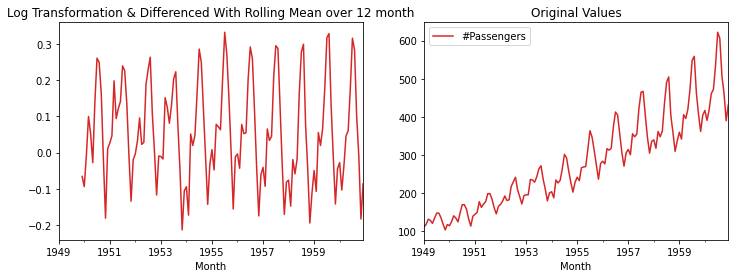

In [33]:
logged_passengers = pd.DataFrame(air_passengers['#Passengers'].apply(lambda x : np.log(x)))
rolling_mean = logged_passengers.rolling(window = 12).mean()
passengers_log_rolled_detrended = logged_passengers['#Passengers'] -rolling_mean['#Passengers']
ax1 = plt.subplot(121)
passengers_log_rolled_detrended.plot(figsize=(12,4),color='tab:red', title='Log Transformation & Differenced With Rolling Mean over 12 month', ax=ax1);
ax2 = plt.subplot(122)
air_passengers.plot(figsize=(12,4), color="tab:red", title='Original Values', ax=ax2);

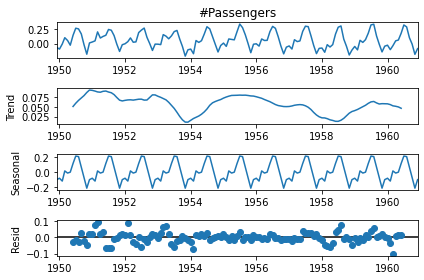

In [34]:
decompose_result = seasonal_decompose(passengers_log_rolled_detrended.dropna())
decompose_result.plot();

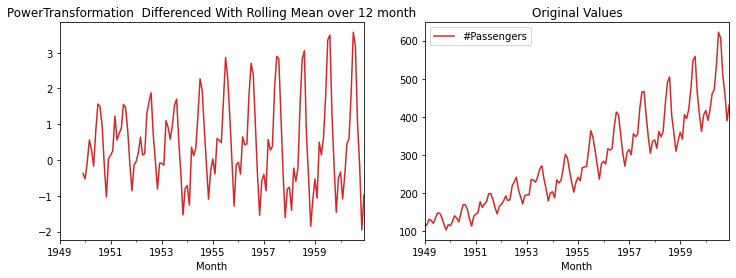

In [36]:
powered_passengers = pd.DataFrame(air_passengers['#Passengers'].apply(lambda x : x **0.5))
rolling_mean = powered_passengers.rolling(window = 12).mean()
passengers_pow_rolled_detrended = powered_passengers['#Passengers'] -rolling_mean['#Passengers']
ax1 = plt.subplot(121)
passengers_pow_rolled_detrended.plot(figsize=(12,4),color='tab:red', title='PowerTransformation  Differenced With Rolling Mean over 12 month', ax=ax1);
ax2 = plt.subplot(122)
air_passengers.plot(figsize=(12,4), color='tab:red', title='Original Values', ax=ax2);

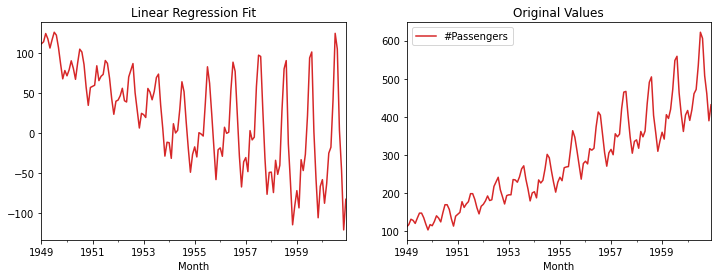

In [38]:
from statsmodels.regression.linear_model import OLS
least_squares = OLS(air_passengers['#Passengers'].values, list(range(air_passengers.shape[0])))
result = least_squares.fit()
fit = pd.Series(result.predict(list(range(air_passengers.shape[0]))), index = air_passengers.index)
passengers_ols_detrended = air_passengers['#Passengers'] - fit
ax1 = plt.subplot(121)
passengers_ols_detrended.plot(figsize=(12,4), color='tab:red', title='Linear Regression Fit',ax=ax1);
ax2 = plt.subplot(122)
air_passengers.plot(figsize=(12,4), color='tab:red', title='Original Values', ax=ax2);

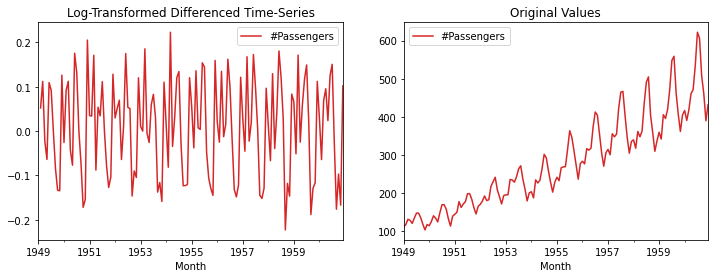

In [39]:
logged_passengers_diff = logged_passengers - logged_passengers.shift()
ax1 = plt.subplot(121)
logged_passengers_diff.plot(figsize=(12,4), color='tab:red', title='Log-Transformed Differenced Time-Series', ax=ax1)
ax2 = plt.subplot(122)
air_passengers.plot(figsize=(12,4), color='tab:red', title='Original Values', ax=ax2);

In [41]:
dftest = adfuller(logged_passengers_diff.dropna()['#Passengers'].values, autolag = 'AIC')
print(dftest[0])
print( dftest[1])
print( dftest[2])
print(dftest[3])
print("5. Critical Values")
for key, val in dftest[4].items():
  print("\t",key, ':', val)

-2.7171305983881284
0.0711205481508595
14
128
5. Critical Values
	 1% : -3.4825006939887997
	 5% : -2.884397984161377
	 10% : -2.578960197753906


In [42]:
dftest = adfuller(powered_passengers['#Passengers'], autolag = 'AIC')
print(dftest[0])
print( dftest[1])
print( dftest[2])
print(dftest[3])
print("5. Critical Values")
for key, val in dftest[4].items():
  print("\t",key, ':', val)

-0.34585376771568216
0.9187543217618357
13
130
5. Critical Values
	 1% : -3.4816817173418295
	 5% : -2.8840418343195267
	 10% : -2.578770059171598


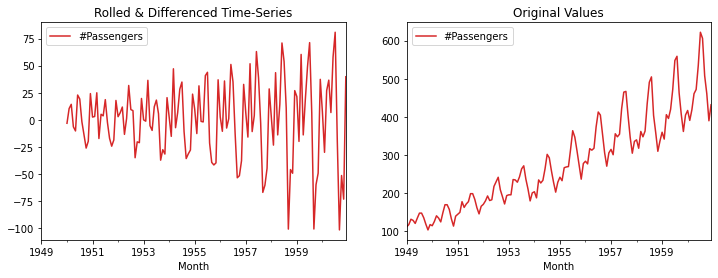

In [43]:
passengers_rolled_detrended_diff = passengers_rolled_detrended -passengers_rolled_detrended.shift()
ax1 = plt.subplot(121)
passengers_rolled_detrended_diff.plot(figsize=(8,4), color='tab:red', title='Rolled & Differenced Time-Series', ax=ax1);
ax2 = plt.subplot(122)
air_passengers.plot(figsize=(12,4), color='tab:red', title='Original Values', ax=ax2);

In [44]:
dftest = adfuller(passengers_rolled_detrended_diff.dropna()['#Passengers'], autolag = 'AIC')
print(dftest[0])
print( dftest[1])
print( dftest[2])
print(dftest[3])
print("5. Critical Values")
for key, val in dftest[4].items():
  print("\t",key, ':', val)

-3.1544826348635744
0.022775264967859313
12
119
5. Critical Values
	 1% : -3.4865346059036564
	 5% : -2.8861509858476264
	 10% : -2.579896092790057


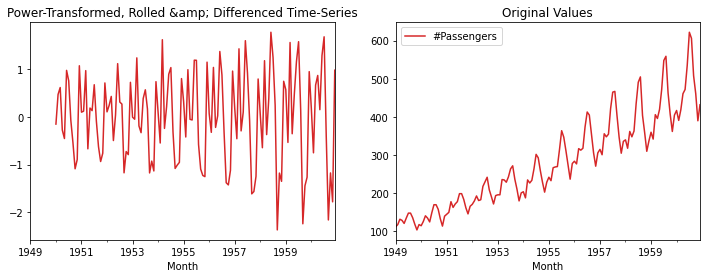

In [45]:
passengers_pow_rolled_detrended_diff = passengers_pow_rolled_detrended -passengers_pow_rolled_detrended.shift()
ax1 = plt.subplot(121)
passengers_pow_rolled_detrended_diff.plot(figsize=(8,4), color='tab:red', title='Power-Transformed, Rolled &amp; Differenced Time-Series', ax=ax1);
ax2 = plt.subplot(122)
air_passengers.plot(figsize=(12,4), color='tab:red', title='Original Values', ax=ax2);

In [47]:
dftest = adfuller(passengers_pow_rolled_detrended_diff.dropna().values, autolag = 'AIC')
print(dftest[0])
print( dftest[1])
print( dftest[2])
print(dftest[3])
print("5. Critical Values")
for key, val in dftest[4].items():
  print("\t",key, ':', val)

-3.6224853361907043
0.005345423958262994
13
118
5. Critical Values
	 1% : -3.4870216863700767
	 5% : -2.8863625166643136
	 10% : -2.580009026141913


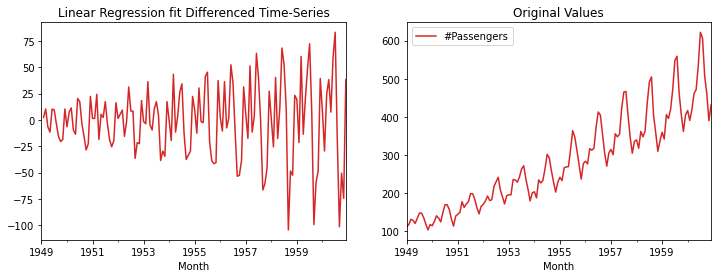

In [48]:
passengers_ols_detrended_diff = passengers_ols_detrended - passengers_ols_detrended.shift()
ax1 = plt.subplot(121)
passengers_ols_detrended_diff.plot(figsize=(8,4), color='tab:red', title='Linear Regression fit Differenced Time-Series', ax=ax1);
ax2 = plt.subplot(122)
air_passengers.plot(figsize=(12,4), color='tab:red', title='Original Values', ax=ax2);

In [49]:
dftest = adfuller(passengers_ols_detrended_diff.dropna().values, autolag = 'AIC')
print(dftest[0])
print( dftest[1])
print( dftest[2])
print(dftest[3])
print("5. Critical Values")
for key, val in dftest[4].items():
  print("\t",key, ':', val)

-2.829266824170019
0.054213290283822914
12
130
5. Critical Values
	 1% : -3.4816817173418295
	 5% : -2.8840418343195267
	 10% : -2.578770059171598
